## Length of the code {-}
No restriction

**Delete this section from the report, when using this template.** 

In [55]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import time 
import itertools 

## Data quality check / cleaning / preparation 

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.** An example is given below.

### Data quality check
*By Luke Lilienthal*

The code below visualizes the distribution of all the variables in the dataset, and their association with the response.

In [56]:
train = pd.read_csv('Effect on Education')

In [57]:
#...Distribution of continuous variables...#
train.describe()

# We look at the scale of variance and quartiles across predictors. 
# The range of values is important to note in order to interpret coefficient results.

,Wage,AFQT,Educ,Exper,Age,Meduc,Logwage
count,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000
mean,1002.269841,101.868481,13.673469,11.555556,33.068027,10.716553,6.826152
std,417.337401,14.882141,2.259817,4.226779,3.012836,2.902025,0.414586
min,233.000000,50.000000,9.000000,1.000000,28.000000,0.000000,5.451038
25%,690.000000,93.000000,12.000000,8.000000,31.000000,8.000000,6.536692
50%,947.000000,103.000000,13.000000,11.000000,33.000000,12.000000,6.853299
75%,1200.000000,112.000000,16.000000,15.000000,36.000000,12.000000,7.090077
max,2500.000000,137.000000,18.000000,22.000000,38.000000,18.000000,7.824046


In [58]:
corr = train.corrwith(train.Wage).sort_values(ascending=False)
print(corr)

#Here we observe relatively low linear correlations with Wage- lets look at correlation with logWage

Wage       1.000000
Logwage    0.962567
Educ       0.358501
AFQT       0.314097
Meduc      0.231794
Age        0.199520
Exper     -0.011772
dtype: float64


In [59]:
logcorr = train.corrwith(train.Logwage).sort_values(ascending=False)
print(logcorr)

#Comprable correlation results- (may suggest low levels of Heteroskedasticity in error terms)

Logwage    1.000000
Wage       0.962567
Educ       0.340705
AFQT       0.332200
Meduc      0.231436
Age        0.198504
Exper      0.014048
dtype: float64


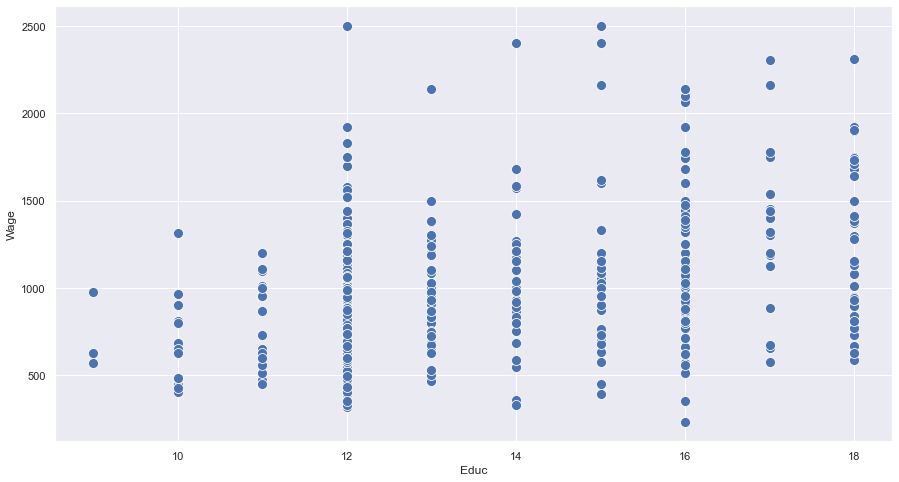

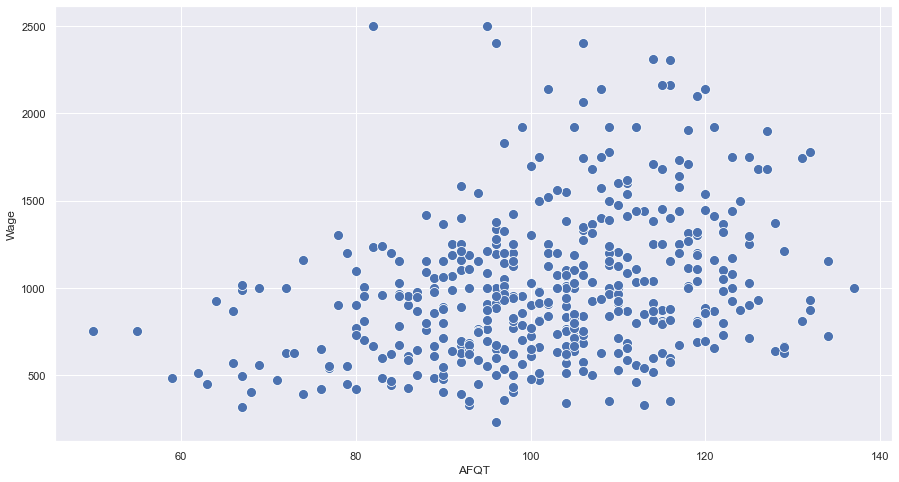

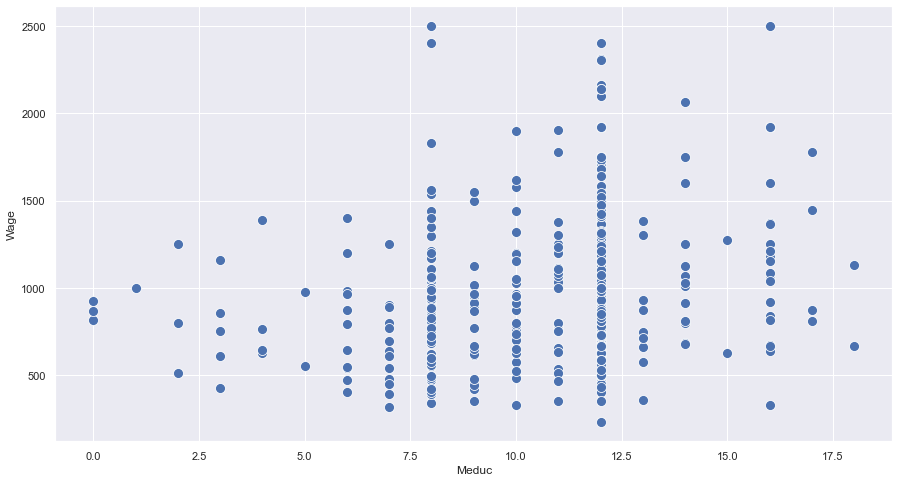

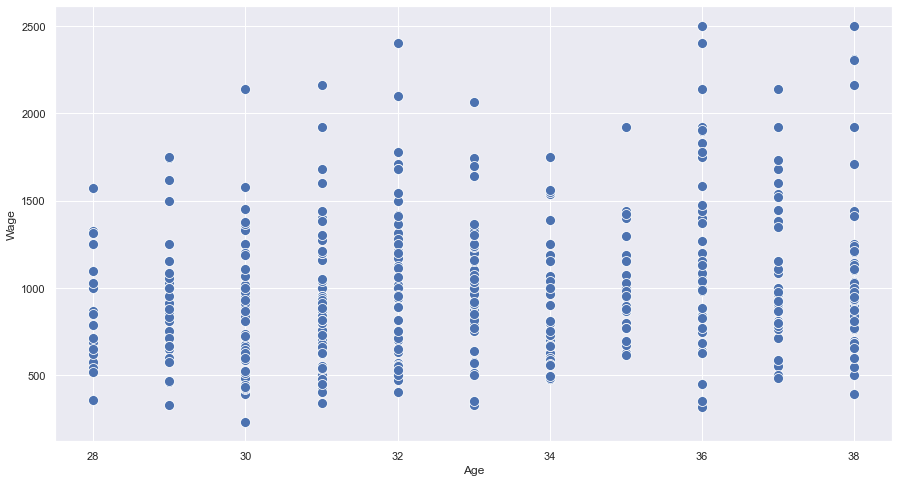

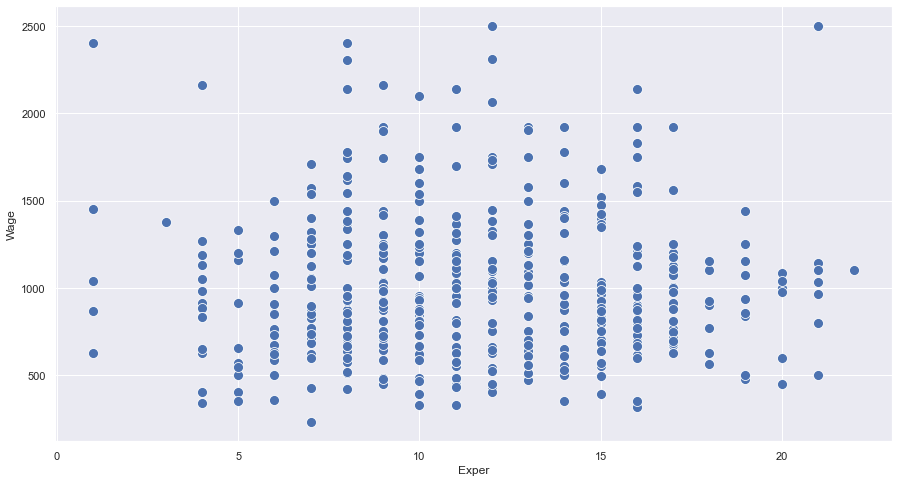

In [60]:
#...Association of the response with the predictors...#

#Look for patterns in individual predictor scatterplots
sns.scatterplot(x=train.Educ, y=train.Wage)
plt.show()

sns.scatterplot(x=train.AFQT, y=train.Wage)
plt.show()

sns.scatterplot(x=train.Meduc, y=train.Wage)
plt.show()

sns.scatterplot(x=train.Age, y=train.Wage)
plt.show()

sns.scatterplot(x=train.Exper, y=train.Wage)
plt.show()

# General positive trends with Wage and fairly weak associations. 
# Apparent non-linear trends with AFQT and Educ

### Data cleaning


We did not have to perform any data cleaning. There were no missing values and everyone who took the survery had to fill out every question. 

### Data preparation
*By Junho Park*

The following data preparation steps helped us to prepare our data for implementing various modeling / validation techniques:

1. We split our data into training and testing datasets for cross-validation purposes. We used the train_test_split method to split 20 percent of our data into testing and 80 percent of our data into training. 

In [61]:
# split data into training and testing data
y = train.iloc[:, 0]
X = train.iloc[:, [1, 2, 3, 4, 5, 6]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

## Exploratory data analysis

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

#### Initial Model and EDA- By Luke Lilienthal

Identify significant relationships with Wage at the 95% confidence level. Look for interactions between the precitors to be utilized in a final model.

In [66]:
#Looking for initial predictor significance with Naive model
model0 = smf.ols(formula='Wage~AFQT+Educ+Exper+Age+Meduc-1', data=train).fit()
model0.summary()

#We observe non-significant relationships with Wage in Age and Meduc. Exper is not significant at the 95% level but is significant at 94%.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Wage   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.876
Method:                 Least Squares   F-statistic:                              499.5
Date:                Sun, 12 Mar 2023   Prob (F-statistic):                   4.34e-156
Time:                        23:03:47   Log-Likelihood:                         -2585.8
No. Observations:                 352   AIC:                                      5182.
Df Residuals:                     347   BIC:                                      5201.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AFQT           4.0209      1.556      2.585      0.010       0.961       7.080
Educ          39.8314     12.698      3.137      0.002      14.856      64.807
Exper         12.5739      6.475      1.942      0.053      -0.162      25.309
Age           -4.8999      5.879     -0.834      0.405     -16.462       6.662
Meduc          5.8914      7.668      0.768      0.443      -9.191      20.974
==============================================================================
Omnibus:                       59.493   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.496
Skew:                           0.996   Prob(JB):                     6.75e-22
Kurtosis:                       4.637   Cond. No.                         75.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

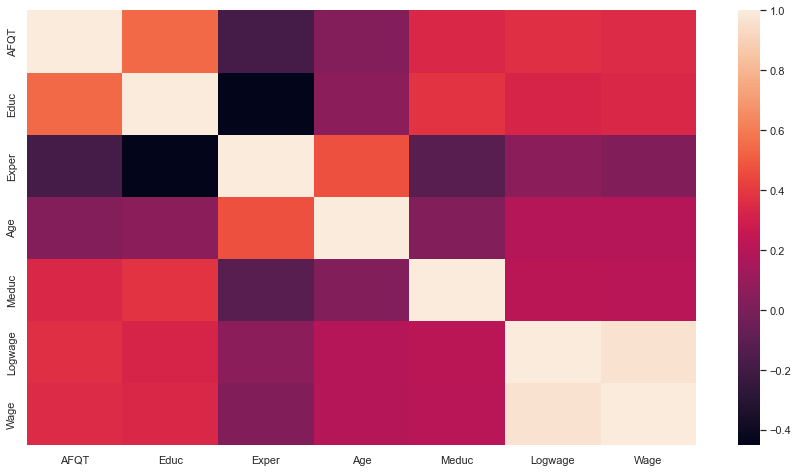

In [67]:
sns.heatmap(train.corr())

#We see high correlations (>0.5) between: Educ and AFQT AND Exper and Age

## Developing the model

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

#### Initial Model - by Luke Lilenthial

In [68]:
#We Begin by analyzing the results of an initial model created from EDA findings
initialmodel = smf.ols(formula='Wage~I(AFQT**2)+Educ+Exper-1', data=train).fit()
initialmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Wage   R-squared (uncentered):                   0.880
Model:                            OLS   Adj. R-squared (uncentered):              0.879
Method:                 Least Squares   F-statistic:                              852.0
Date:                Sun, 12 Mar 2023   Prob (F-statistic):                   3.57e-160
Time:                        23:03:52   Log-Likelihood:                         -2583.1
No. Observations:                 352   AIC:                                      5172.
Df Residuals:                     349   BIC:                                      5184.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
I(AFQT ** 2)     0.0301      0.008      3.735      0.000       0.014       0.046
Educ            39.0676      6.850      5.703      0.000      25.595      52.540
Exper           12.6895      3.749      3.385      0.001       5.316      20.063
==============================================================================
Omnibus:                       58.289   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.998
Skew:                           0.980   Prob(JB):                     2.35e-21
Kurtosis:                       4.623   Cond. No.                     3.86e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Colinearity analysis of initial model - by Diqiao Wang

In [29]:
X = train[['AFQT','Educ','Exper','Age','Meduc','Wage']]
X.columns[1:]

Index(['Educ', 'Exper', 'Age', 'Meduc', 'Wage'], dtype='object')

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

  feature         VIF
0   const  175.661848
1    AFQT    1.532951
2    Educ    2.120606
3   Exper    1.861446
4     Age    1.473844
5   Meduc    1.208841
6    Wage    1.245449


Computing the VIF values of the predictors for our initial model, we find that the predictors all have a VIF value relatively close to 1, meaning there is no evidence of collinearity between our predictors. 

In [31]:
1/(1-0.877)

8.130081300813009

We find the VIF value of our response variable, wage, is 8.13 using our initial model. This ia moderate value, meaning we can overlook the assumption of collinearity in our initial model. 

#### Model Assumptions - by Junho Park

Check the RMSE values for the training and test data to check for overfitting.

In [32]:
pred_wage = initialmodel.predict(train)
np.sqrt(((train.Wage - pred_wage)**2).mean())

372.1630333735138

In [33]:
pred_wage = initialmodel.predict(test)
np.sqrt(((test.Wage - pred_wage)**2).mean())

414.8114189856498

Since the RMSE values are similar, we can conclude that there is no evidence of overfitting in our initial model

Now, we can plot the residuals vs. fitted values plot to check for model assumptions.

Text(0.5, 1.0, 'Residuals vs Fitted Values Plot for Initial Model on Train')

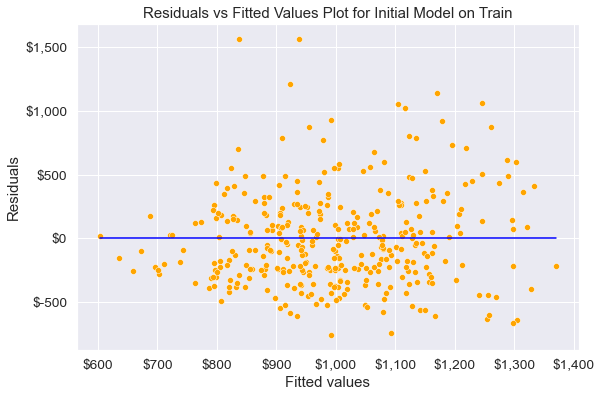

In [34]:
pred_wage = initialmodel.predict(train)

#Plotting residuals vs fitted values
plt.rcParams["figure.figsize"] = (9,6)
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = initialmodel.fittedvalues, y=initialmodel.resid,color = 'orange')
sns.lineplot(x = [pred_wage.min(),pred_wage.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.xaxis.set_major_formatter('${x:,.0f}')
plt.title('Residuals vs Fitted Values Plot for Initial Model on Train')


Text(0.5, 1.0, 'Residuals vs Fitted Values Plot for Initial Model on Test')

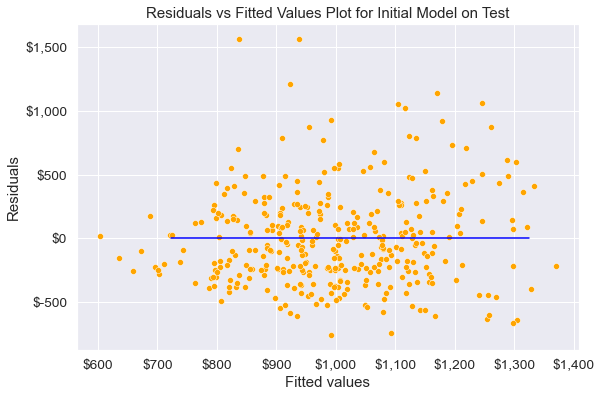

In [35]:
pred_wage = initialmodel.predict(test)

#Plotting residuals vs fitted values
plt.rcParams["figure.figsize"] = (9,6)
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = initialmodel.fittedvalues, y=initialmodel.resid,color = 'orange')
sns.lineplot(x = [pred_wage.min(),pred_wage.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.xaxis.set_major_formatter('${x:,.0f}')
plt.title('Residuals vs Fitted Values Plot for Initial Model on Test')


We find that the non-linearity and the constant variance assumptions are both met for our initial model. The non-linearity assumption is met since we do not observe a strong pattern in the residuals around the line Residuals = 0. Residuals are distributed more or less in a similar manner on both sides of the blue line for all fitted values. The constant variance assumption is met since we see that the variance of errors seems to stay constant with increase in the fitted values.

#### Outliers and Influential Point Analysis - By Junho Park

In [36]:
out_1 = initialmodel.outlier_test()
np.sum((np.abs(out_1.student_resid)>3))

4

We observe that our model contains 4 outliers

0

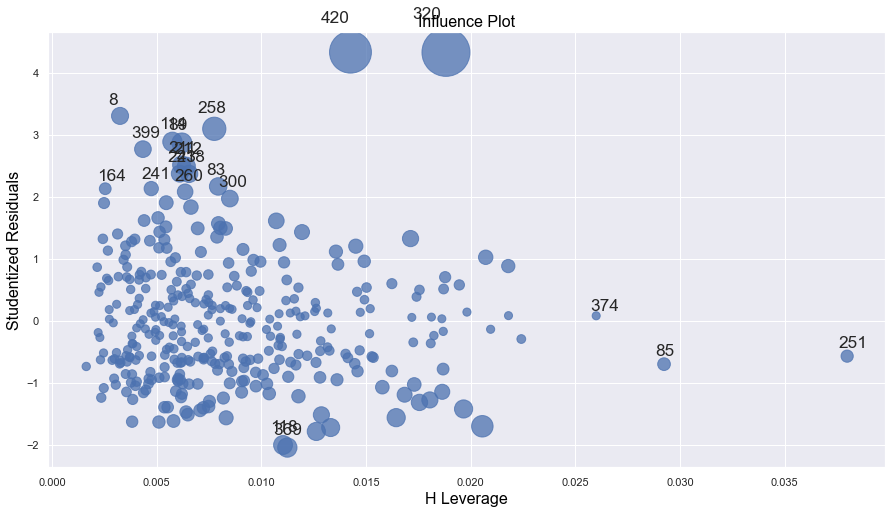

In [37]:
influence_1 = initialmodel.get_influence()
leverage_1 = influence_1.hat_matrix_diag

sns.set(rc={'figure.figsize':(15,8)})
sm.graphics.influence_plot(initialmodel);
out = initialmodel.outlier_test()
average_leverage_1 = (initialmodel.df_model+1)/initialmodel.nobs
high_leverage_threshold_1 = 4*average_leverage_1
np.sum(leverage_1>high_leverage_threshold_1)

We observe that none of the outliers are influential points. We have no influential points, which means there is no need to delete any observations from our data. 

#### Errors and Homoscedasticity - Diqiao Wang

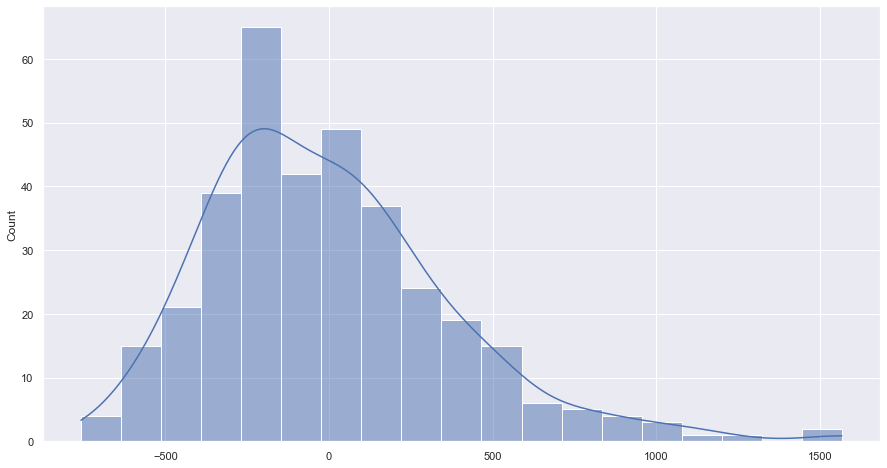

In [38]:
sns.histplot(data=initialmodel.resid, kde=True)
plt.show()

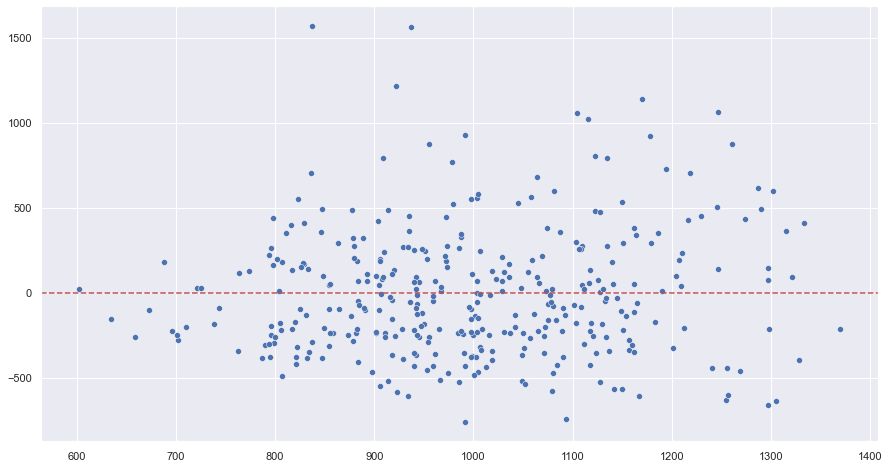

In [39]:
sns.scatterplot(data=train, x=initialmodel.predict(), y=initialmodel.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

#### Best Subset and Stepwise Selection - by Alanda Zong

The following code uses best subset selection to develop a linear regression model 

In [72]:
#Creating a dataframe with all the predictors
X = train[['AFQT', 'Educ', 'Exper', 'Age', 'Meduc']]
#Since 'X' will change when we include interactions, we need a backup containing all individual predictors
X_backup = train[['AFQT', 'Educ', 'Exper', 'Age', 'Meduc']]

In [73]:
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = smf.ols('Wage~' + '+'.join(predictor_subset),data = train).fit()
    Rsquared = model.rsquared
    return {"model":model, "Rsquared":Rsquared}

#Function to select the best model amongst all models with 'k' predictors
def getBest_model(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

#Function to select the best model amongst the best models for 'k' predictors, where k = 1,2,3,..
models_best = pd.DataFrame(columns=["Rsquared", "model"])

tic = time.time()
for i in range(1,1+X.shape[1]):
    models_best.loc[i] = getBest_model(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 5 models on 1 predictors in 0.0474240779876709 seconds.
Processed 10 models on 2 predictors in 0.0659782886505127 seconds.
Processed 10 models on 3 predictors in 0.06647896766662598 seconds.
Processed 5 models on 4 predictors in 0.03646492958068848 seconds.
Processed 1 models on 5 predictors in 0.009146928787231445 seconds.
Total elapsed time: 0.23686695098876953 seconds.


The best_sub_plots() function below plots the different metrics for the models processed through our selection methods. 

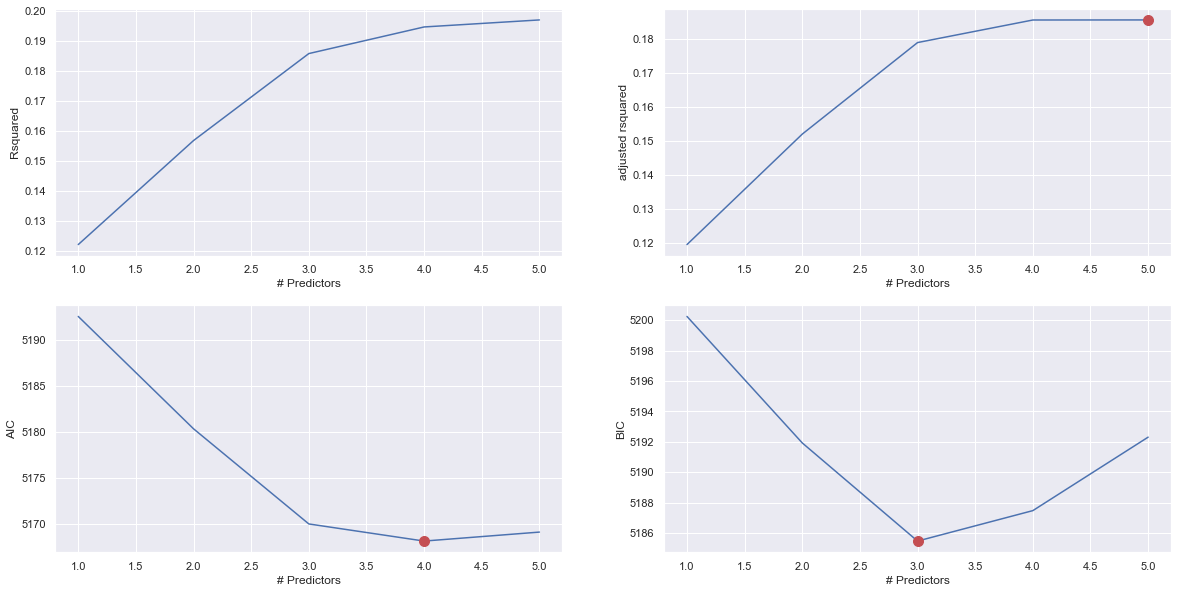

In [74]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Rsquared')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
best_sub_plots()

In [43]:
best_subset_model = models_best.loc[3,'model']
models_best.loc[3,'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wage   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     26.48
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           1.88e-15
Time:                        22:31:24   Log-Likelihood:                -2581.0
No. Observations:                 352   AIC:                             5170.
Df Residuals:                     348   BIC:                             5185.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -617.8618    187.627     -3.293      0.001    -986.888    -248.836
AFQT           5.9646      1.581      3.772      0.000       2.855       9.074
Educ          56.9250     11.641      4.890      0.000      34.029      79.821
Exper         19.6625      5.286      3.720      0.000       9.266      30.059
==============================================================================
Omnibus:                       55.665   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.217
Skew:                           0.931   Prob(JB):                     9.45e-21
Kurtosis:                       4.679   Cond. No.                         985.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We then use forward stepwise selection to create another best subset model that includes all the interaction terms. 

In [44]:
#Including 2-factor interactions of predictors in train and 'X'. Note that we need train to develop the model, and X to 
#find 'k' variable subsets from amongst all the predictors under consideration
for combo in itertools.combinations(X_backup.columns, 2):    
    train['_'.join(combo)] = train[combo[0]]*train[combo[1]]
    test['_'.join(combo)] = test[combo[0]]*test[combo[1]]
    X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)] 
    
models_best = pd.DataFrame(columns=["Rsquared", "model"])

tic = time.time()
for i in range(1,1+X.shape[1]):
    models_best.loc[i] = getBest_model(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

/var/folders/gh/frqw2mqn69x5lnrt3dnw117m0000gn/T/ipykernel_64026/4278178705.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)]
/var/folders/gh/frqw2mqn69x5lnrt3dnw117m0000gn/T/ipykernel_64026/4278178705.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)]
/var/folders/gh/frqw2mqn69x5lnrt3dnw117m0000gn/T/ipykernel_64026/4278178705.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy

Processed 15 models on 1 predictors in 0.06177997589111328 seconds.
Processed 105 models on 2 predictors in 0.7683670520782471 seconds.
Processed 455 models on 3 predictors in 3.3091912269592285 seconds.
Processed 1365 models on 4 predictors in 9.536314010620117 seconds.
Processed 3003 models on 5 predictors in 24.97944188117981 seconds.
Processed 5005 models on 6 predictors in 52.78409290313721 seconds.
Processed 6435 models on 7 predictors in 85.22962474822998 seconds.
Processed 6435 models on 8 predictors in 86.30519199371338 seconds.
Processed 5005 models on 9 predictors in 75.31455588340759 seconds.
Processed 3003 models on 10 predictors in 47.209213972091675 seconds.
Processed 1365 models on 11 predictors in 22.900638818740845 seconds.
Processed 455 models on 12 predictors in 8.204099893569946 seconds.
Processed 105 models on 13 predictors in 1.847677230834961 seconds.
Processed 15 models on 14 predictors in 0.30989694595336914 seconds.
Processed 1 models on 15 predictors in 0.02

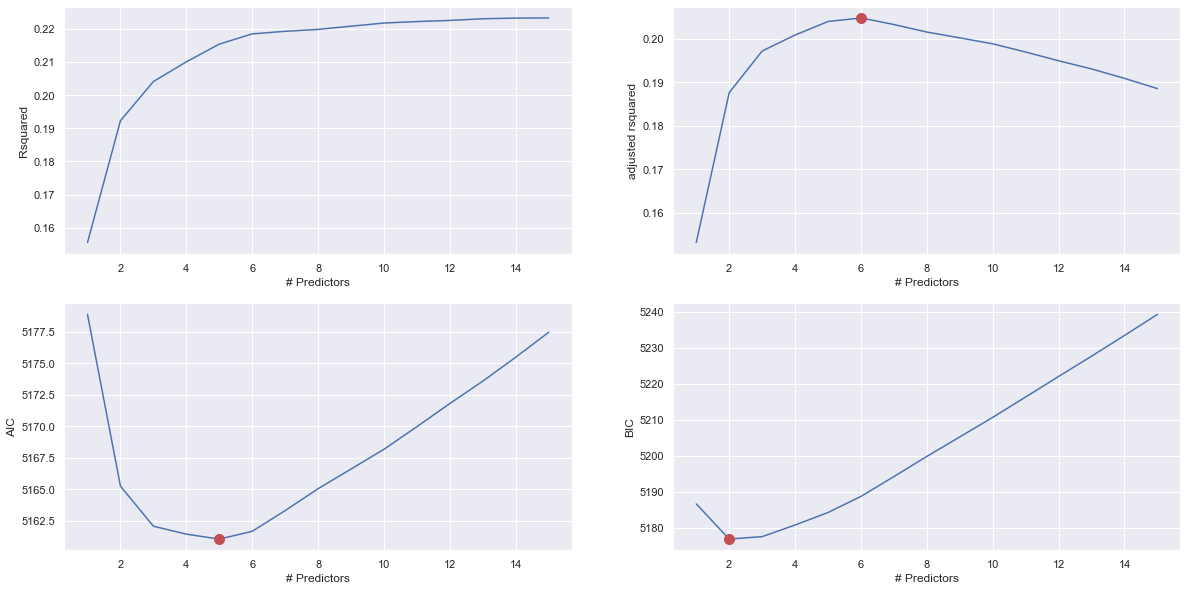

In [45]:
best_sub_plots()

In [46]:
best_interaction_model = models_best['model'][2]
best_interaction_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wage   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     41.53
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           6.60e-17
Time:                        22:38:33   Log-Likelihood:                -2579.6
No. Observations:                 352   AIC:                             5165.
Df Residuals:                     349   BIC:                             5177.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    157.4828     96.433      1.633      0.103     -32.180     347.146
AFQT_Educ      0.4178      0.051      8.141      0.000       0.317       0.519
Educ_Exper     1.6136      0.398      4.050      0.000       0.830       2.397
==============================================================================
Omnibus:                       57.045   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.382
Skew:                           0.937   Prob(JB):                     7.14e-22
Kurtosis:                       4.769   Cond. No.                     7.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now we use forward stepwise selection to develop our linear regression model, including interaction terms.

In [75]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

def forward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [76]:
models_best = forward_selection()

Processed  5 models on 1 predictors in 0.04542207717895508 seconds.
Processed  4 models on 2 predictors in 0.03238987922668457 seconds.
Processed  3 models on 3 predictors in 0.025897979736328125 seconds.
Processed  2 models on 4 predictors in 0.027591943740844727 seconds.
Processed  1 models on 5 predictors in 0.016424894332885742 seconds.
Total elapsed time: 0.16126585006713867 seconds.


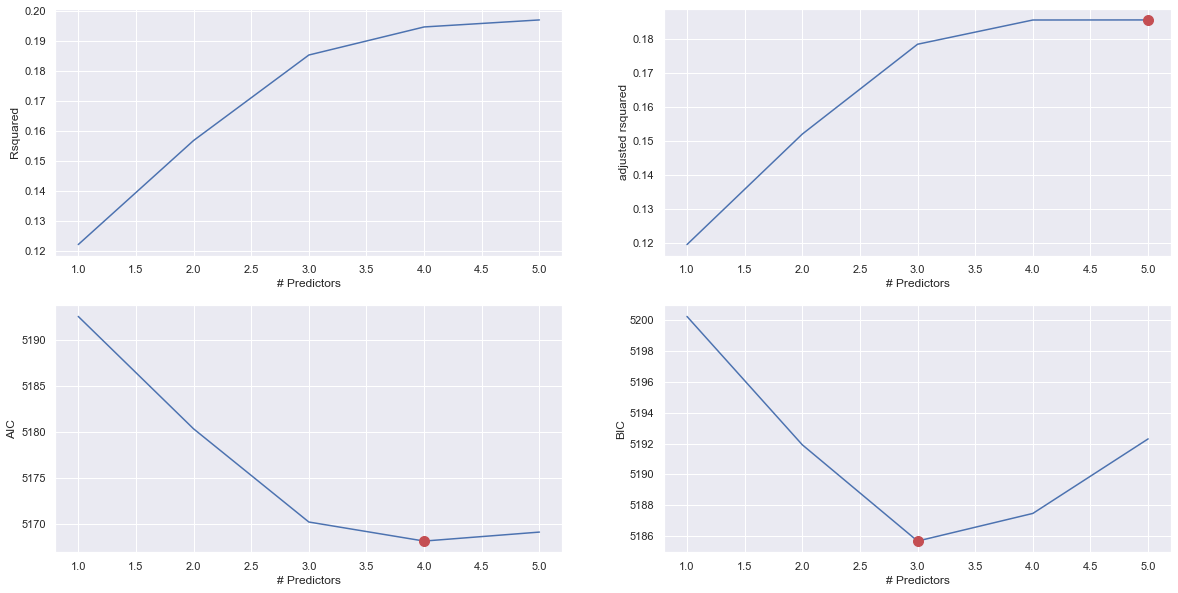

In [77]:
best_sub_plots()

In [78]:

best_fwd_reg_model = models_best['model'][3]
best_fwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wage   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     26.40
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           2.09e-15
Time:                        23:04:45   Log-Likelihood:                -2581.1
No. Observations:                 352   AIC:                             5170.
Df Residuals:                     348   BIC:                             5186.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -962.5180    257.171     -3.743      0.000   -1468.323    -456.713
AFQT           6.3815      1.577      4.046      0.000       3.279       9.484
Age           24.3069      6.586      3.691      0.000      11.353      37.260
Educ          36.8696     10.562      3.491      0.001      16.096      57.643
==============================================================================
Omnibus:                       42.919   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.351
Skew:                           0.809   Prob(JB):                     4.76e-14
Kurtosis:                       4.250   Cond. No.                     1.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

def backward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"], index = range(1,len(X.columns)))

    tic = time.time()
    predictors = X.columns
    models_best.loc[len(predictors)] = processSubset(predictors)
    
    while(len(predictors) > 1):  
        models_best.loc[len(predictors)-1] = backward(predictors)
        predictors = models_best.loc[len(predictors)-1]["model"].params.index[1:]

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [80]:
models_best = backward_selection()

Processed  5 models on 4 predictors in 0.0491640567779541 seconds.
Processed  4 models on 3 predictors in 0.037505149841308594 seconds.
Processed  3 models on 2 predictors in 0.02972698211669922 seconds.
Processed  2 models on 1 predictors in 0.01798105239868164 seconds.
Total elapsed time: 0.15656709671020508 seconds.


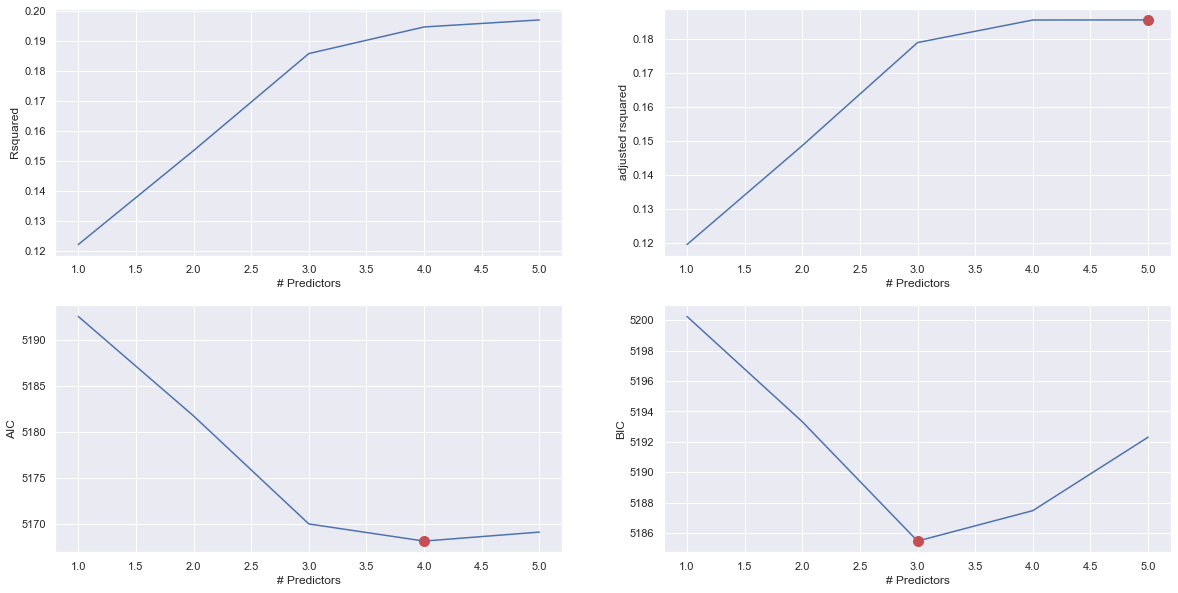

In [81]:
best_sub_plots()

In [54]:
best_bwd_reg_model = models_best['model'][3]
best_bwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wage   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     28.82
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           1.15e-16
Time:                        22:39:57   Log-Likelihood:                -2578.1
No. Observations:                 352   AIC:                             5164.
Df Residuals:                     348   BIC:                             5180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -205.1478    232.568     -0.882      0.378    -662.563     252.267
Age           13.2101      7.714      1.713      0.088      -1.962      28.382
AFQT_Educ      0.4115      0.051      8.021      0.000       0.311       0.512
Educ_Exper     1.1866      0.469      2.530      0.012       0.264       2.109
==============================================================================
Omnibus:                       50.609   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.973
Skew:                           0.878   Prob(JB):                     4.31e-18
Kurtosis:                       4.540   Cond. No.                     1.73e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Code fitting the final model

Put the code(s) that fit the final model(s) in separate cell(s), i.e., the code with the `.ols()` or `.logit()` functions.

In [84]:
modelfinal1 = smf.ols(formula='Wage~I(AFQT**2)*Educ+Exper-1', data=train).fit()
modelfinal1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Wage   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.872
Method:                 Least Squares   F-statistic:                              480.0
Date:                Sun, 12 Mar 2023   Prob (F-statistic):                   3.33e-123
Time:                        17:36:57   Log-Likelihood:                         -2069.4
No. Observations:                 281   AIC:                                      4147.
Df Residuals:                     277   BIC:                                      4161.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
I(AFQT ** 2)          0.0091      0.019      0.481      0.631      -0.028       0.047
Educ                 36.6787      8.673      4.229      0.000      19.606      53.751
I(AFQT ** 2):Educ     0.0013      0.001      1.056      0.292      -0.001       0.004
Exper                17.8231      5.891      3.025      0.003       6.226      29.421
==============================================================================
Omnibus:                       45.590   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.148
Skew:                           0.947   Prob(JB):                     2.15e-16
Kurtosis:                       4.604   Cond. No.                     6.53e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Final Model - by Luke

In [20]:
#Using logwage

In [83]:
modelfinal_log = smf.ols(formula='Logwage~I(AFQT**2)*Educ+Exper-1', data=train).fit()
modelfinal_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Logwage   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          2.172e+04
Date:                Sun, 12 Mar 2023   Prob (F-statistic):                        0.00
Time:                        23:26:27   Log-Likelihood:                         -203.53
No. Observations:                 352   AIC:                                      415.1
Df Residuals:                     348   BIC:                                      430.5
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
I(AFQT ** 2)          0.0005   1.94e-05     23.683      0.000       0.000       0.000
Educ                  0.4535      0.009     50.936      0.000       0.436       0.471
I(AFQT ** 2):Educ -3.172e-05   1.25e-06    -25.318      0.000   -3.42e-05   -2.93e-05
Exper                 0.0390      0.006      6.574      0.000       0.027       0.051
==============================================================================
Omnibus:                        0.843   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.656   Jarque-Bera (JB):                0.717
Skew:                          -0.108   Prob(JB):                        0.699
Kurtosis:                       3.046   Cond. No.                     6.64e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Conclusions and Recommendations to stakeholder(s)


We found out rather strong associations with wage in AFQT and Educ. That means, usually, though not causal, smarter kids tend to have  more years of education and can earn more when they're young-middle aged. 

Also, we see high correlation between Educ and AFQT, which could either mean that smarter kids get higher levels of education or that higher level education makes kids behave better in the AFQT, which proves the effectiveness of education.